<a href="https://colab.research.google.com/github/CodeHunterOfficial/ABC_DataMining/blob/main/ML/Practica/TS/1_0_0_%D0%92%D0%B2%D0%B5%D0%B4%D0%B5%D0%BD%D0%B8%D0%B5_%D0%B2_%D0%B0%D0%BD%D0%B0%D0%BB%D0%B8%D0%B7_%D0%B2%D1%80%D0%B5%D0%BC%D0%B5%D0%BD%D0%BD%D1%8B%D1%85_%D1%80%D1%8F%D0%B4%D0%BE%D0%B2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Тема 1. Введение в анализ временных рядов

### Определение и основные понятия временных рядов

**Временной ряд** — это последовательность наблюдений, собранных через равные промежутки времени. Эти данные важны для понимания и прогнозирования различных явлений, будь то экономические показатели, погодные условия или финансовые рынки.


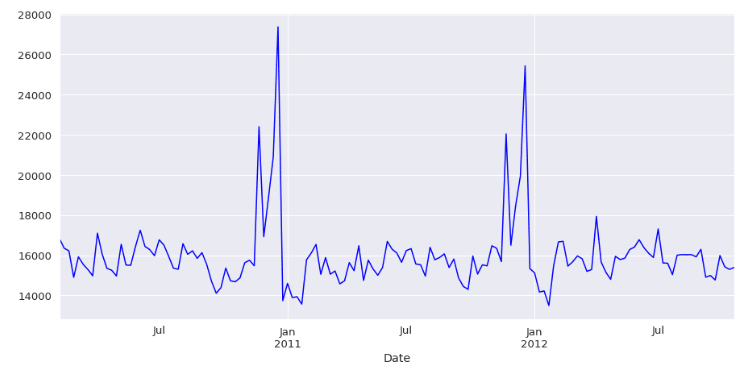


Основные понятия временных рядов включают:

1. **Наблюдение (Observation)**: например, температура в определенный день:
   - 1 января 2023 года: 5°C
   - 2 января 2023 года: 4°C
   - 3 января 2023 года: 6°C

2. **Временной промежуток (Time Interval)**: интервал между двумя последовательными наблюдениями, например, дневной интервал:
   - Разница между 1 и 2 января 2023 года: 1 день
   - Разница между 2 и 3 января 2023 года: 1 день

3. **Автокорреляция (Autocorrelation)**: мера сходства между наблюдениями в временном ряду, взятыми с некоторым лагом, например, сравнение значений с лагом 1 день.

4. **Лаг (Lag)**: задержка между наблюдениями, например, лаг в один день означает сравнение значений, разделенных на один день.

### Компоненты временных рядов

Временные ряды можно разложить на несколько основных компонентов:

1. **Тренд (Trend)**: долгосрочное движение временного ряда, например, устойчивый рост температуры в течение десятилетий.

2. **Сезонность (Seasonality)**: регулярные колебания, связанные с определенными периодами времени, например, увеличение продаж перед праздниками.

3. **Циклы (Cycles)**: нерегулярные колебания, связанные с экономическими или деловыми циклами, например, изменения в объемах производства в зависимости от текущей экономической ситуации.

4. **Случайные колебания (Random or Irregular Fluctuations)**: непредсказуемые изменения, которые не могут быть объяснены трендом, сезонностью или циклами, например, влияние стихийных бедствий на погодные условия.

### Источники данных временных рядов

Источники данных временных рядов разнообразны:

1. **Экономические и финансовые данные**: данные о ВВП, индексах фондовых рынков, курсах валют.
   - Например, ВВП страны:
     - Q1 2023: 1200 млрд долларов
     - Q2 2023: 1250 млрд долларов
     - Q3 2023: 1230 млрд долларов

2. **Метеорологические данные**: данные о температуре, осадках, скорости ветра.
   - Например, осадки за месяц:
     - Январь 2023: 50 мм
     - Февраль 2023: 40 мм
     - Март 2023: 60 мм

3. **Социальные данные**: данные о уровне безработицы, демографические показатели.
   - Например, уровень безработицы:
     - Январь 2023: 5%
     - Февраль 2023: 4.8%
     - Март 2023: 5.2%

4. **Промышленные данные**: данные о объемах производства, продажах, запасах.
   - Например, объем производства автомобилей:
     - Январь 2023: 10000 автомобилей
     - Февраль 2023: 10500 автомобилей
     - Март 2023: 11000 автомобилей


### Примеры временных рядов
1. Ежемесячные продажи антидиабетических лекарств в Австралии с июля 1991 по июнь 2008. На этом графике мы можем видеть возрастающий тренд, возможно, даже нелинейный, и кроме этого есть сезонность (периодичность) значений по годам.


Text(0.5, 1.0, 'AntiDiabetic Drug Sales in Australia')

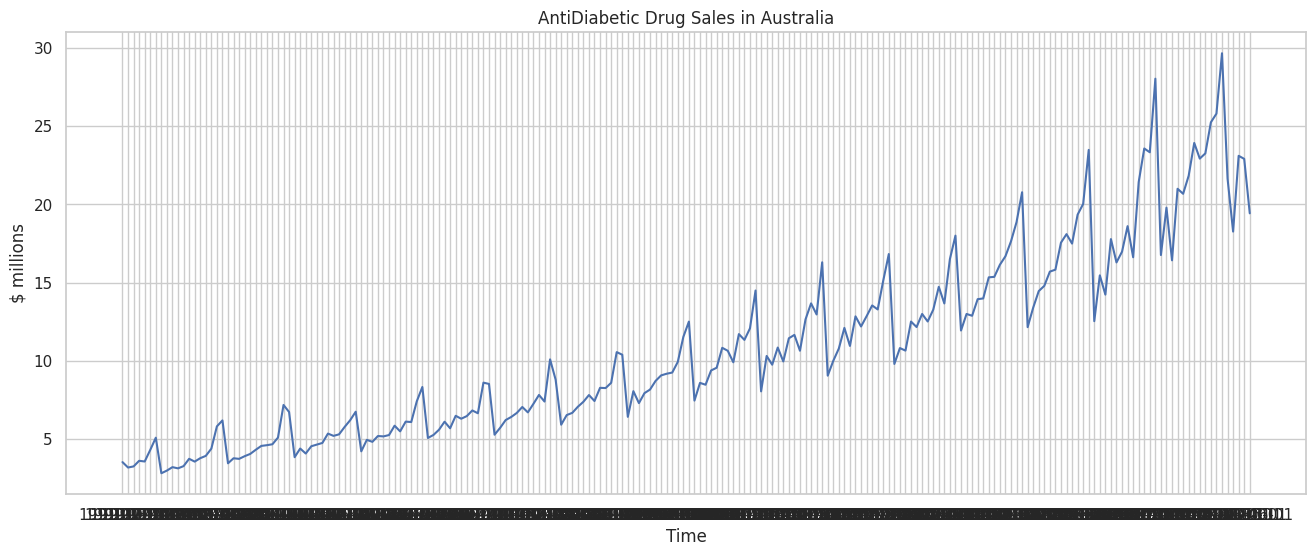

In [ ]:
#Basic importation
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib
matplotlib.rc('xtick', labelsize=40)
matplotlib.rc('ytick', labelsize=40)

import seaborn as sns
sns.set(style="whitegrid", color_codes=True)
%matplotlib inline
ts= pd.read_csv('/content/AusAntidiabeticDrug.csv')

plt.figure(figsize=(16,6))
plt.plot(ts["ds"],ts["y"])
plt.xlabel("Time")
plt.ylabel("$ millions")
plt.title("AntiDiabetic Drug Sales in Australia")


2. Максимальный спрос на электричество в штате Виктория (Австралия) за 30-минутные интервалы с 10 января 2000 в течении 115 дней. Здесь мы можем наблюдать сразу две сезонности – суточную и недельную. Первая сезонность вызвана тем, что люди обычно больше потребляют электричество днем, чем ночью. Недельная сезонность вызвана более высоким потреблением электричества по будням. Если бы мы посмотрели данные за несколько лет, то увидели бы еще одну сезонность – годовую, например, вызванную тем, что в теплое время года работает больше кондиционеров.


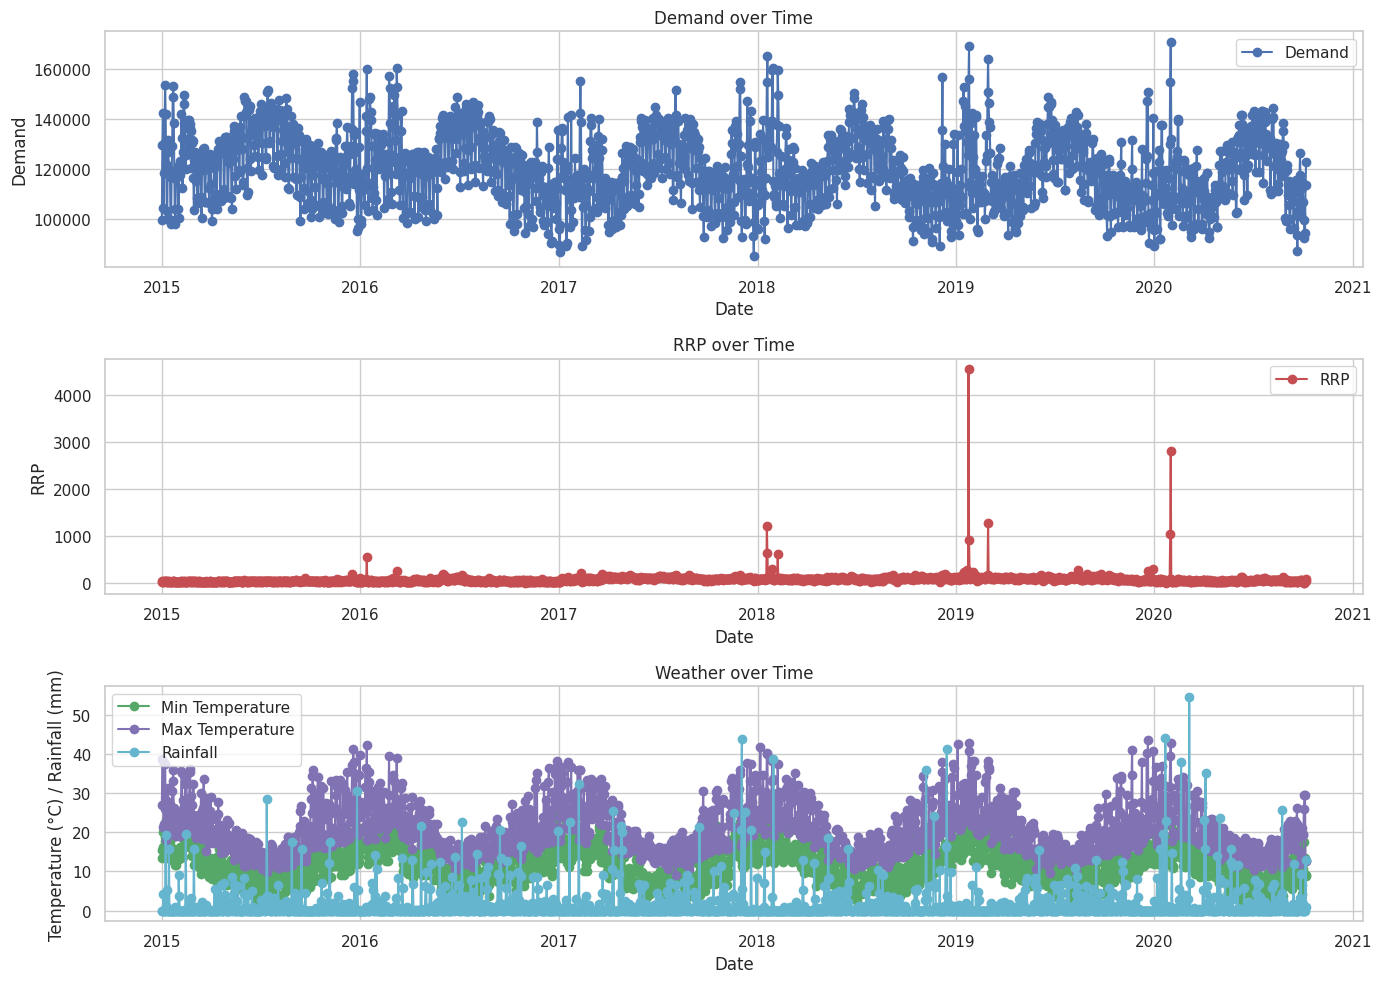

In [ ]:
df = pd.read_csv('/content/complete_dataset.csv')

df['date'] = pd.to_datetime(df['date'])  # Convert date column to datetime format

# Plotting
plt.figure(figsize=(14, 10))

# Plot demand
plt.subplot(3, 1, 1)
plt.plot(df['date'], df['demand'], marker='o', linestyle='-', color='b', label='Demand')
plt.title('Demand over Time')
plt.xlabel('Date')
plt.ylabel('Demand')
plt.grid(True)
plt.legend()

# Plot RRP
plt.subplot(3, 1, 2)
plt.plot(df['date'], df['RRP'], marker='o', linestyle='-', color='r', label='RRP')
plt.title('RRP over Time')
plt.xlabel('Date')
plt.ylabel('RRP')
plt.grid(True)
plt.legend()

# Plot temperatures and rainfall
plt.subplot(3, 1, 3)
plt.plot(df['date'], df['min_temperature'], marker='o', linestyle='-', color='g', label='Min Temperature')
plt.plot(df['date'], df['max_temperature'], marker='o', linestyle='-', color='m', label='Max Temperature')
plt.plot(df['date'], df['rainfall'], marker='o', linestyle='-', color='c', label='Rainfall')
plt.title('Weather over Time')
plt.xlabel('Date')
plt.ylabel('Temperature (°C) / Rainfall (mm)')
plt.grid(True)
plt.legend()

plt.tight_layout()
plt.show()

###  Хранение временных рядов

#### Введение

Хранение данных временных рядов играет ключевую роль в их анализе, прогнозировании и использовании для принятия решений в различных областях, таких как финансы, метеорология, здравоохранение и технологии. В этом разделе  рассмотрим основные аспекты хранения временных рядов, включая структуру данных, методы сжатия, индексацию и безопасность данных.

#### 1. Формат данных временных рядов

Временные ряды обычно представляются в виде пар (время, значение), где каждая запись содержит временную метку и соответствующее значение ряда. Например, для ряда температурных измерений это может быть:

```plaintext
| Время             | Температура (°C) |
|-------------------|------------------|
| 2023-01-01 00:00  | 5                |
| 2023-01-01 01:00  | 4                |
| 2023-01-01 02:00  | 6                |
| ...               | ...              |
```

Это позволяет хранить и структурировать данные таким образом, чтобы они были готовы для последующего анализа и использования.

#### 2. Структура данных и таблицы

Для хранения временных рядов в базах данных часто используются таблицы, где каждая строка представляет собой отдельное наблюдение, а столбцы содержат метки времени и значения. Пример структуры таблицы для временного ряда температур:

```sql
CREATE TABLE temperature (
    timestamp TIMESTAMP,
    temperature FLOAT
);
```

Здесь `timestamp` — временная метка, а `temperature` — числовое значение температуры.

#### 3. Частота наблюдений

Важным аспектом является определение частоты наблюдений в ряде. Она определяет, с какой частотой собираются данные и как часто они сохраняются в базе данных. Например, данные могут быть собраны с интервалом в секунды, минуты, часы, дни или месяцы, в зависимости от требований и контекста приложения.

#### 4. Учет временных зон и дополнительных атрибутов

Если данные временных рядов собираются из разных временных зон или имеют дополнительные атрибуты, такие как погодные условия или географические данные, важно сохранить информацию о временных зонах и других атрибутах. Это помогает в последующем анализе и интерпретации данных.

#### 5. Сжатие и оптимизация хранения

Учитывая большой объем данных временных рядов, эффективное сжатие и оптимизация хранения являются критически важными. Использование специализированных форматов данных или методов сжатия может значительно уменьшить объем занимаемого места и повысить производительность при доступе к данным.

#### 6. Индексация для быстрого доступа

Индексация данных по времени позволяет быстро извлекать необходимые фрагменты временных рядов для анализа или представления. Это особенно важно при работе с большими объемами данных или при реальном времени анализе, когда скорость доступа к данным критически важна.

#### 7. Резервное копирование и безопасность

Так как данные временных рядов часто имеют стратегическое значение для бизнеса или научных исследований, важно регулярно создавать резервные копии данных и обеспечивать их безопасность. Это помогает минимизировать риск потери данных из-за технических сбоев или человеческих ошибок.


### Приведение временных рядов из разных временных зон в одну
Приведение временных рядов из разных временных зон в одну — важная задача при анализе данных, особенно если данные собираются из глобальных источников или различных устройств. Вот несколько методов, которые могут быть использованы для этой цели:

### 1. Приведение к общей временной зоне

Один из наиболее распространенных подходов — это приведение всех временных рядов к общей временной зоне. Например, можно привести все данные к временной зоне UTC (Coordinated Universal Time), которая является стандартом времени во всем мире.

#### Пример приведения временного ряда к UTC в Python с использованием библиотеки pandas:



In [ ]:
import pandas as pd
from pytz import timezone

# Пример данных с разными временными зонами
data = {
    'timestamp': ['2023-01-01 00:00:00', '2023-01-01 01:00:00', '2023-01-01 02:00:00'],
    'temperature': [5, 4, 6],
    'timezone': ['Europe/Moscow', 'America/New_York', 'Asia/Tokyo']
}

# Создание DataFrame
df = pd.DataFrame(data)

# Приведение временных меток к UTC
df['timestamp'] = pd.to_datetime(df['timestamp'])
for i, tz in enumerate(df['timezone']):
    df.loc[i, 'timestamp'] = df.loc[i, 'timestamp'].tz_localize(tz).tz_convert('UTC').tz_localize(None)

print(df)

            timestamp  temperature          timezone
0 2022-12-31 21:00:00            5     Europe/Moscow
1 2023-01-01 06:00:00            4  America/New_York
2 2022-12-31 17:00:00            6        Asia/Tokyo


В этом примере данные приводятся к UTC, начиная с локализации временных меток по указанным временным зонам, затем конвертированием в UTC и удалением информации о временной зоне.

### 2. Использование временных смещений

Если данные имеют известные временные смещения относительно общей временной зоны, можно просто добавить или вычесть соответствующее количество часов, минут или секунд для приведения их к общему формату. Этот подход требует заранее известного смещения для каждой временной метки.




In [ ]:
import pandas as pd
from datetime import timedelta

# Пример данных с известными временными смещениями
data = {
    'timestamp': ['2023-01-01 00:00:00', '2023-01-01 01:00:00', '2023-01-01 02:00:00'],
    'temperature': [5, 4, 6],
    'timezone_offset': [3, -5, 9]
}

# Создание DataFrame
df = pd.DataFrame(data)

# Приведение временных меток к UTC
df['timestamp'] = pd.to_datetime(df['timestamp'])
df['timestamp'] = df['timestamp'] + df['timezone_offset'].apply(lambda x: timedelta(hours=x))

print(df)

            timestamp  temperature  timezone_offset
0 2023-01-01 03:00:00            5                3
1 2022-12-31 20:00:00            4               -5
2 2023-01-01 11:00:00            6                9



### 3. Использование стандартов передачи данных

Некоторые протоколы и стандарты передачи данных, такие как ISO 8601, поддерживают явное указание временной зоны в данных. При использовании таких стандартов приложениям легче интерпретировать временные метки правильно, даже если они представлены в разных временных зонах.

In [ ]:
import pandas as pd

# Пример данных в формате ISO 8601
data = {
    'timestamp': ['2023-01-01T00:00:00+03:00', '2023-01-01T01:00:00-05:00', '2023-01-01T02:00:00+09:00'],
    'temperature': [5, 4, 6]
}

# Создание DataFrame
df = pd.DataFrame(data)

# Приведение временных меток к UTC
df['timestamp'] = pd.to_datetime(df['timestamp'])

print(df)

                   timestamp  temperature
0  2023-01-01 00:00:00+03:00            5
1  2023-01-01 01:00:00-05:00            4
2  2023-01-01 02:00:00+09:00            6


<ipython-input-5-aec0f15936ad>:13: FutureWarning: In a future version of pandas, parsing datetimes with mixed time zones will raise an error unless `utc=True`. Please specify `utc=True` to opt in to the new behaviour and silence this warning. To create a `Series` with mixed offsets and `object` dtype, please use `apply` and `datetime.datetime.strptime`
  df['timestamp'] = pd.to_datetime(df['timestamp'])


### Визуализация и предварительный анализ временных рядов

Визуализация данных временных рядов является первым шагом в их анализе:

1. **Линейные графики (Line Plots)**: графическое представление временного ряда по времени.
   - Например, линейный график температуры в течение года.



Для примера возьмем случайный временной ряд, представляющий сезонные колебания с добавлением шума.

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# Генерация случайного временного ряда
np.random.seed(0)
dates = pd.date_range(start='2023-01-01', end='2023-12-31', freq='D')
temperature = np.sin(np.arange(len(dates)) * (2 * np.pi / 365)) * 10 + np.random.normal(size=len(dates))

# Создание DataFrame
df = pd.DataFrame({'Date': dates, 'Temperature': temperature})
df.set_index('Date', inplace=True)

# Сохранение DataFrame в файл
df.to_csv('temperature_data.csv', index=True)

Данный код на языке Python предназначен для генерации и сохранения случайного временного ряда, представляющего собой данные о температуре в течение года. Рассмотрим его поэтапно.

1. **Импорт библиотек**:
   ```python
   import pandas as pd
   import numpy as np
   import matplotlib.pyplot as plt
   ```
   В этом фрагменте кода осуществляется импорт трех ключевых библиотек:
   - `pandas`: используется для работы с табличными данными и временными рядами.
   - `numpy`: предоставляет функции для выполнения числовых операций, включая генерацию случайных чисел.
   - `matplotlib.pyplot`: предназначена для визуализации данных, хотя в данном коде визуализация не реализована.

2. **Генерация случайного временного ряда**:
   ```python
   np.random.seed(0)
   dates = pd.date_range(start='2023-01-01', end='2023-12-31', freq='D')
   temperature = np.sin(np.arange(len(dates)) * (2 * np.pi / 365)) * 10 + np.random.normal(size=len(dates))
   ```
   - `np.random.seed(0)`: устанавливает начальное значение для генератора случайных чисел, что позволяет воспроизводить результаты при каждом запуске кода.
   - `pd.date_range(...)`: создает диапазон дат с 1 января 2023 года по 31 декабря 2023 года с частотой один день (`freq='D'`).
   - `temperature`: вычисляет значения температуры, используя синусоидальную функцию, которая моделирует сезонные изменения температуры в течение года. К результату добавляется нормально распределенный шум, что делает данные более реалистичными.

3. **Создание DataFrame**:
   ```python
   df = pd.DataFrame({'Date': dates, 'Temperature': temperature})
   df.set_index('Date', inplace=True)
   ```
   - Здесь создается объект `DataFrame`, который представляет собой табличную структуру данных с двумя столбцами: 'Date' и 'Temperature'.
   - `df.set_index('Date', inplace=True)`: устанавливает столбец 'Date' в качестве индекса `DataFrame`, что позволяет удобно обращаться к данным по датам.

4. **Сохранение DataFrame в файл**:
   ```python
   df.to_csv('temperature_data.csv', index=True)
   ```
   - Этот фрагмент кода сохраняет созданный `DataFrame` в файл формата CSV с именем 'temperature_data.csv'. Параметр `index=True` указывает на то, что индекс (в данном случае даты) также должен быть сохранен в файл.

Таким образом, данный код иллюстрирует процесс генерации, обработки и сохранения временного ряда данных, который может быть использован для дальнейшего анализа или визуализации.

**Линейные графики (Line Plots):**

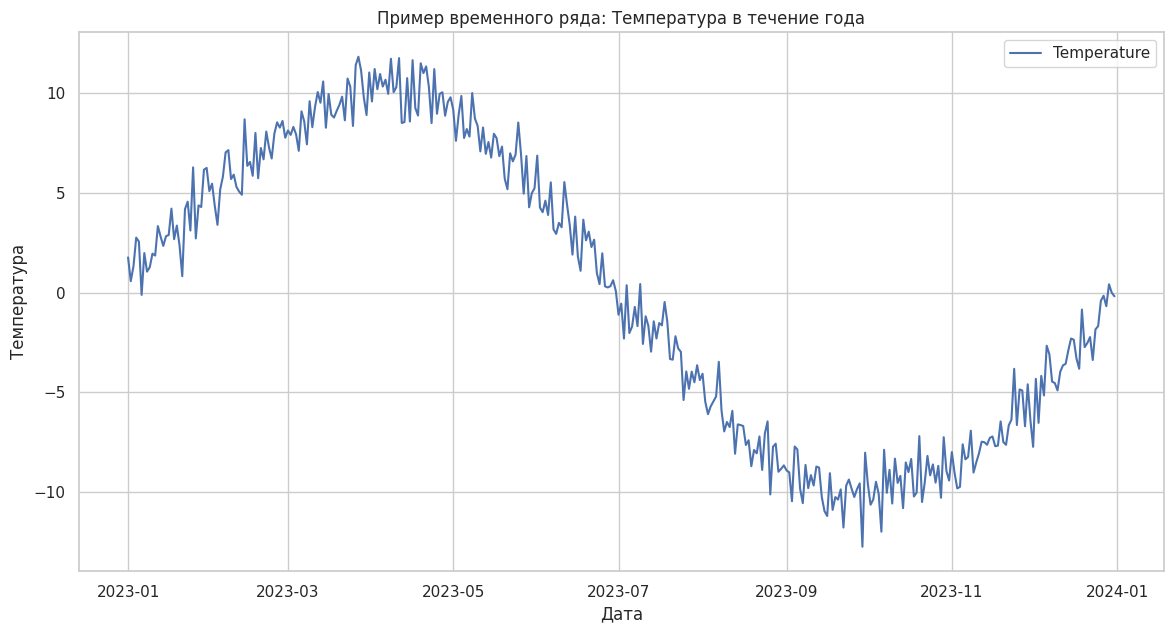

In [ ]:
# Чтение DataFrame из файла
df_read = pd.read_csv('temperature_data.csv', index_col='Date', parse_dates=['Date'])

# Визуализация исходного временного ряда
plt.figure(figsize=(14, 7))
plt.plot(df.index, df['Temperature'], label='Temperature')
plt.title('Пример временного ряда: Температура в течение года')
plt.xlabel('Дата')
plt.ylabel('Температура')
plt.legend(loc='upper right')
plt.grid(True)
plt.show()

2. **Гистограммы (Histograms)**: визуализация распределения значений временного ряда.
   - Например, гистограмма осадков по месяцам.



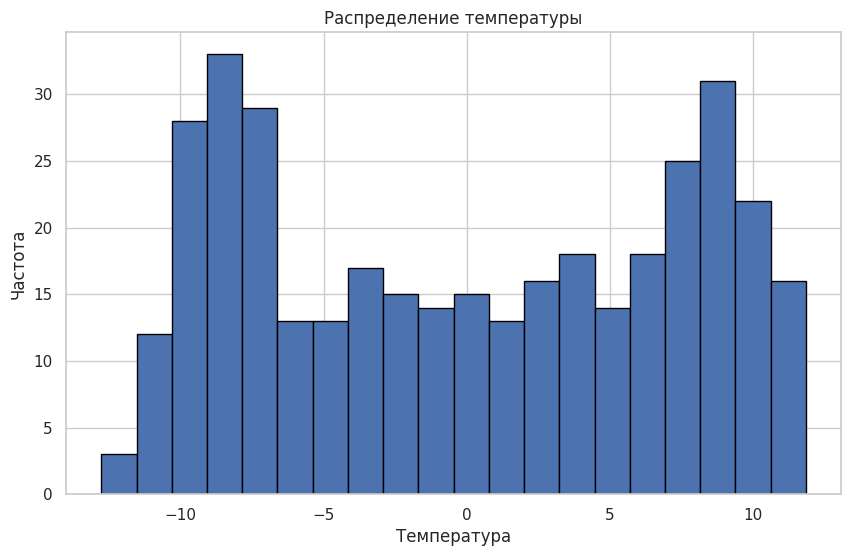

In [ ]:
plt.figure(figsize=(10, 6))
plt.hist(df['Temperature'], bins=20, edgecolor='black')
plt.title('Распределение температуры')
plt.xlabel('Температура')
plt.ylabel('Частота')
plt.grid(True)
plt.show()

Данный код использует библиотеку Matplotlib для визуализации распределения температуры, представленной в DataFrame. Рассмотрим его поэтапно:

1. **Создание фигуры**:
   ```python
   plt.figure(figsize=(10, 6))
   ```
   Здесь создается новая фигура для графика с заданными размерами 10 на 6 дюймов. Это позволяет задать размерность области для отображения графика.

2. **Построение гистограммы**:
   ```python
   plt.hist(df['Temperature'], bins=20, edgecolor='black')
   ```
   - `plt.hist(...)`: функция для построения гистограммы, которая показывает распределение значений температуры.
   - `df['Temperature']`: передает данные о температуре из DataFrame.
   - `bins=20`: указывает количество корзин (или интервалов), на которые будут разбиты данные для построения гистограммы. В данном случае используется 20 корзин.
   - `edgecolor='black'`: задает цвет границ каждой корзины черным, что улучшает визуальное восприятие графика.

3. **Настройка заголовка и меток осей**:
   ```python
   plt.title('Распределение температуры')
   plt.xlabel('Температура')
   plt.ylabel('Частота')
   ```
   - `plt.title(...)`: задает заголовок графика, в данном случае «Распределение температуры».
   - `plt.xlabel(...)`: задает метку для оси X, обозначающую значения температуры.
   - `plt.ylabel(...)`: задает метку для оси Y, обозначающую частоту (количество наблюдений) для каждого интервала температуры.

4. **Добавление сетки**:
   ```python
   plt.grid(True)
   ```
   Эта команда добавляет сетку на график, что помогает лучше ориентироваться в значениях и их частоте.

5. **Отображение графика**:
   ```python
   plt.show()
   ```
   Эта команда выводит график на экран, позволяя пользователю визуально оценить распределение температуры.

Таким образом, данный код создает и отображает гистограмму, которая иллюстрирует, как распределены значения температуры в заданном временном ряде, что может быть полезно для анализа данных и выявления их характеристик.

3. **Корреляционные графики (Autocorrelation Plots)**: оценка зависимости между значениями временного ряда с различными лагами.
   - Например, корреляционный график для температуры с лагами.



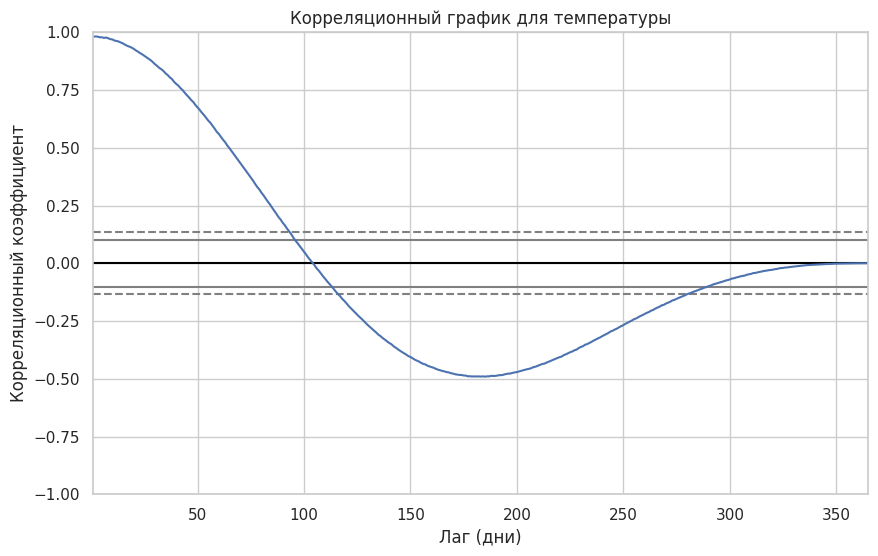

In [ ]:
plt.figure(figsize=(10, 6))
pd.plotting.autocorrelation_plot(df['Temperature'])
plt.title('Корреляционный график для температуры')
plt.xlabel('Лаг (дни)')
plt.ylabel('Корреляционный коэффициент')
plt.grid(True)
plt.show()

Данный код использует библиотеку Matplotlib в сочетании с функциональностью библиотеки Pandas для построения корреляционного графика (графика автокорреляции) для временного ряда температуры. Рассмотрим его поэтапно:

1. **Создание фигуры**:
   ```python
   plt.figure(figsize=(10, 6))
   ```
   Эта строка создает новую фигуру для графика с заданными размерами 10 на 6 дюймов, что позволяет лучше организовать пространство для визуализации.

2. **Построение графика автокорреляции**:
   ```python
   pd.plotting.autocorrelation_plot(df['Temperature'])
   ```
   - `pd.plotting.autocorrelation_plot(...)`: функция из библиотеки Pandas, которая строит график автокорреляции для заданного временного ряда.
   - `df['Temperature']`: передает данные о температуре из DataFrame. Автокорреляция показывает, насколько значения временного ряда в определенный момент времени коррелируют с его значениями в предыдущие моменты (лагах).

3. **Настройка заголовка и меток осей**:
   ```python
   plt.title('Корреляционный график для температуры')
   plt.xlabel('Лаг (дни)')
   plt.ylabel('Корреляционный коэффициент')
   ```
   - `plt.title(...)`: задает заголовок графика, в данном случае «Корреляционный график для температуры».
   - `plt.xlabel(...)`: задает метку для оси X, обозначающую лаг в днях, то есть временные отрезки, на которые сдвигается временной ряд для вычисления корреляции.
   - `plt.ylabel(...)`: задает метку для оси Y, обозначающую корреляционный коэффициент, который показывает силу и направление связи между значениями временного ряда на разных лагах.

4. **Добавление сетки**:
   ```python
   plt.grid(True)
   ```
   Эта команда добавляет сетку на график, что улучшает восприятие данных и помогает лучше ориентироваться в значениях.

5. **Отображение графика**:
   ```python
   plt.show()
   ```
   Эта команда выводит график на экран, позволяя пользователю визуально оценить автокорреляцию значений температуры.

Таким образом, данный код создает и отображает график автокорреляции, который позволяет исследовать взаимосвязь значений температуры во времени. Это может помочь в выявлении сезонных паттернов или циклов в данных, что является важным аспектом анализа временных рядов.

4. **Сезонные графики (Seasonal Plots)**: отображение сезонных колебаний в данных.
   - Например, сезонный график продаж в зависимости от месяца.


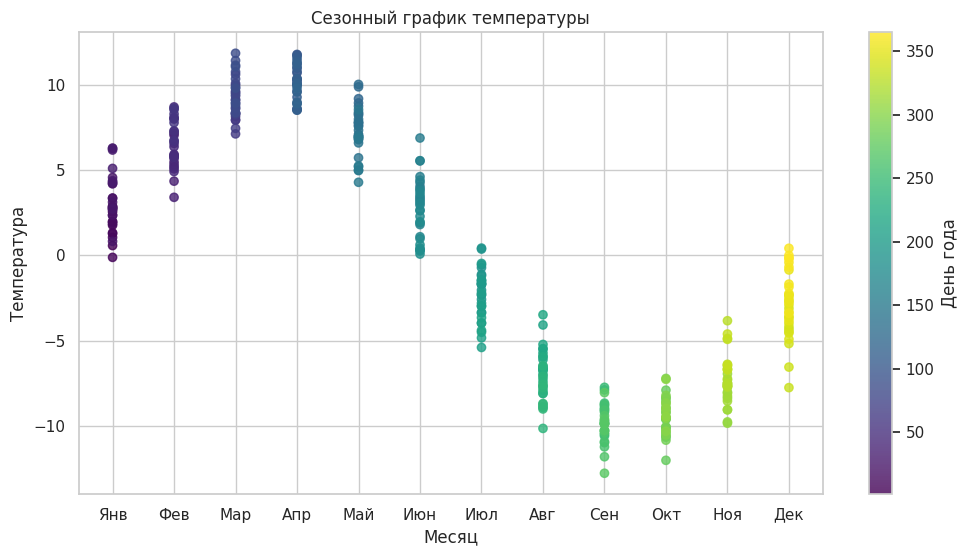

In [ ]:
# Добавим столбец с месяцем
df['Month'] = df.index.month

# Построим сезонный график
plt.figure(figsize=(12, 6))
plt.scatter(df['Month'], df['Temperature'], alpha=0.8, c=df.index.dayofyear, cmap='viridis')
plt.colorbar(label='День года')
plt.title('Сезонный график температуры')
plt.xlabel('Месяц')
plt.ylabel('Температура')
plt.xticks(range(1, 13), ['Янв', 'Фев', 'Мар', 'Апр', 'Май', 'Июн', 'Июл', 'Авг', 'Сен', 'Окт', 'Ноя', 'Дек'])
plt.grid(True)
plt.show()

Помимо линейных графиков, гистограмм, корреляционных и сезонных графиков, существует несколько других видов графиков для визуализации временных рядов, которые могут быть полезны в различных аспектах анализа данных. Вот некоторые из них:

1. **Точечные графики (Scatter Plots)**:
   - Позволяют визуально оценить взаимосвязь между двумя временными рядами или между временным рядом и другими переменными.
   - Например, можно построить точечный график для сравнения двух временных рядов, например, температуры и числа продаж.


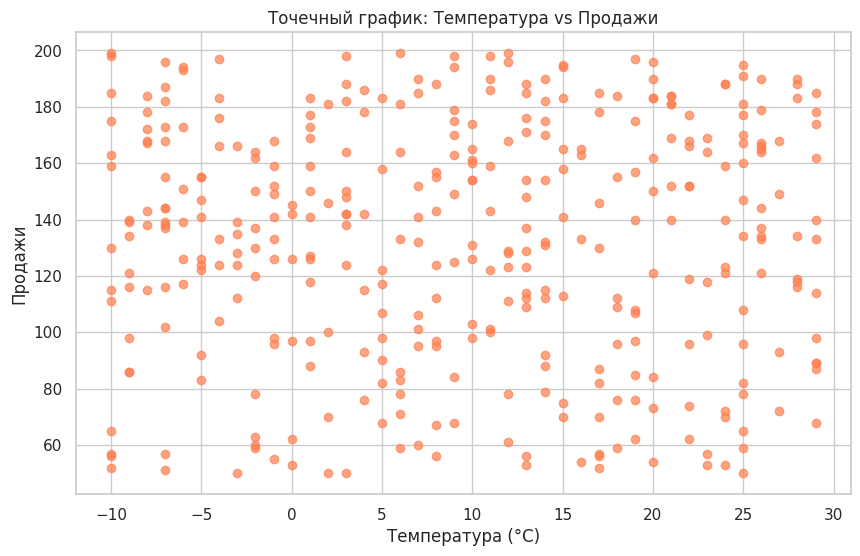

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# Генерация искусственного временного ряда
np.random.seed(0)
date_range = pd.date_range(start='2023-01-01', end='2023-12-31', freq='D')
temperature = np.random.randint(low=-10, high=30, size=len(date_range))
sales = np.random.randint(low=50, high=200, size=len(date_range))

# Создание DataFrame с временными данными
df = pd.DataFrame({'Date': date_range, 'Temperature': temperature, 'Sales': sales})
df.set_index('Date', inplace=True)

# 1. Точечный график (Scatter Plot)
plt.figure(figsize=(10, 6))
plt.scatter(df['Temperature'], df['Sales'], color='coral', alpha=0.7)
plt.title('Точечный график: Температура vs Продажи')
plt.xlabel('Температура (°C)')
plt.ylabel('Продажи')
plt.grid(True)
plt.show()

Данный код  предназначен для генерации искусственного временного ряда, содержащего данные о температуре и продажах, а также для визуализации взаимосвязи между этими двумя переменными с помощью точечного графика. Рассмотрим его поэтапно.

1. **Импорт библиотек**:
   ```python
   import pandas as pd
   import numpy as np
   import matplotlib.pyplot as plt
   ```
   В этом фрагменте кода осуществляется импорт трех ключевых библиотек:
   - `pandas`: используется для работы с табличными данными.
   - `numpy`: предоставляет функции для выполнения числовых операций, включая генерацию случайных чисел.
   - `matplotlib.pyplot`: предназначена для визуализации данных.

2. **Генерация искусственного временного ряда**:
   ```python
   np.random.seed(0)
   date_range = pd.date_range(start='2023-01-01', end='2023-12-31', freq='D')
   temperature = np.random.randint(low=-10, high=30, size=len(date_range))
   sales = np.random.randint(low=50, high=200, size=len(date_range))
   ```
   - `np.random.seed(0)`: устанавливает начальное значение для генератора случайных чисел, что позволяет воспроизводить результаты.
   - `pd.date_range(...)`: создает диапазон дат с 1 января 2023 года по 31 декабря 2023 года с частотой один день.
   - `temperature`: генерирует массив случайных целых чисел, представляющих температуру в диапазоне от -10 до 30 градусов Цельсия.
   - `sales`: генерирует массив случайных целых чисел, представляющих продажи в диапазоне от 50 до 200 единиц.

3. **Создание DataFrame**:
   ```python
   df = pd.DataFrame({'Date': date_range, 'Temperature': temperature, 'Sales': sales})
   df.set_index('Date', inplace=True)
   ```
   - Создается объект `DataFrame`, который содержит три колонки: даты, температуры и продажи.
   - `df.set_index('Date', inplace=True)`: устанавливает столбец с датами в качестве индекса DataFrame, что упрощает дальнейшую работу с временными рядами.

4. **Построение точечного графика**:
   ```python
   plt.figure(figsize=(10, 6))
   plt.scatter(df['Temperature'], df['Sales'], color='coral', alpha=0.7)
   ```
   - `plt.figure(figsize=(10, 6))`: создает новую фигуру для графика с заданными размерами.
   - `plt.scatter(...)`: строит точечный график, где по оси X откладываются значения температуры, а по оси Y — значения продаж.
     - `color='coral'`: задает цвет точек графика.
     - `alpha=0.7`: устанавливает уровень прозрачности точек, что позволяет лучше видеть перекрытия.

5. **Настройка заголовка и меток осей**:
   ```python
   plt.title('Точечный график: Температура vs Продажи')
   plt.xlabel('Температура (°C)')
   plt.ylabel('Продажи')
   ```
   - `plt.title(...)`: задает заголовок графика.
   - `plt.xlabel(...)`: задает метку для оси X, обозначающую температуру в градусах Цельсия.
   - `plt.ylabel(...)`: задает метку для оси Y, обозначающую количество продаж.

6. **Добавление сетки и отображение графика**:
   ```python
   plt.grid(True)
   plt.show()
   ```
   - `plt.grid(True)`: добавляет сетку на график, что улучшает его восприятие.
   - `plt.show()`: выводит график на экран.

Таким образом, данный код создает и отображает точечный график, который иллюстрирует взаимосвязь между температурой и продажами. Это может помочь в анализе зависимости между этими переменными и выявлении возможных трендов или закономерностей.


2. **Сглаживание (Smoothing Plots)**:
   - Используются для сглаживания временных рядов и выявления долгосрочных трендов.
   - Методы сглаживания могут включать скользящее среднее или экспоненциальное сглаживание.



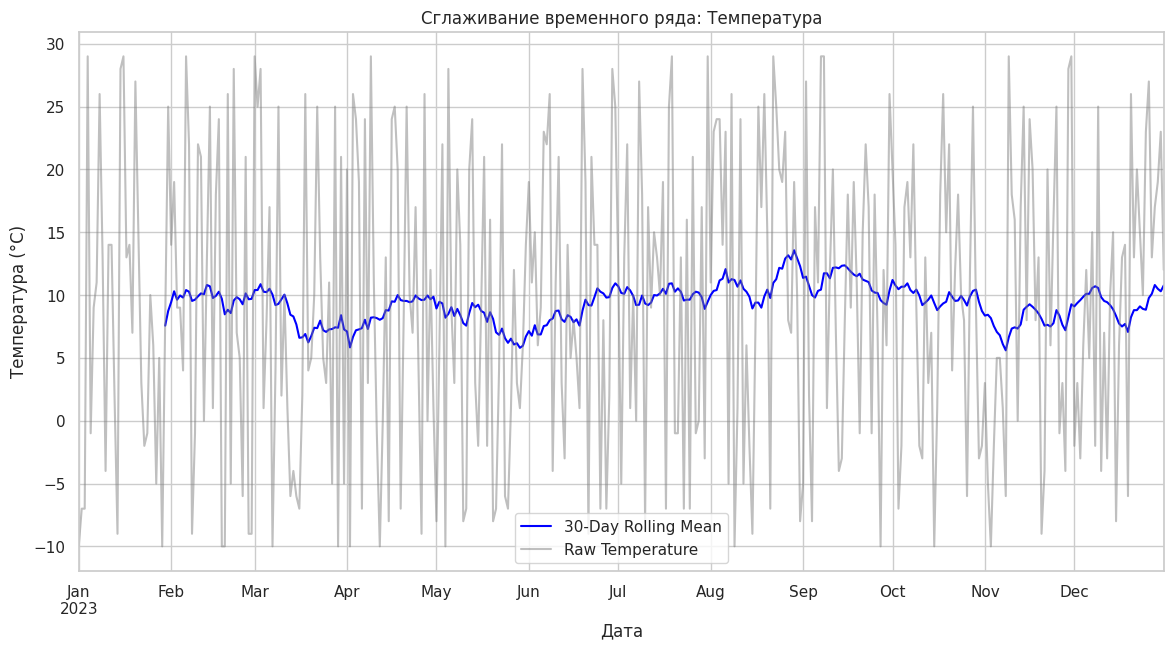

In [ ]:
# 2. Сглаживание (Smoothing Plot)
plt.figure(figsize=(14, 7))
df['Temperature'].rolling(window=30).mean().plot(color='blue', label='30-Day Rolling Mean')
plt.plot(df['Temperature'], color='gray', alpha=0.5, label='Raw Temperature')
plt.title('Сглаживание временного ряда: Температура')
plt.xlabel('Дата')
plt.ylabel('Температура (°C)')
plt.legend()
plt.grid(True)
plt.show()

3. **Контурные графики (Contour Plots)**:
   - Используются для визуализации трехмерных данных временных рядов, где время, значение и еще один параметр представлены на осях.
   - Например, можно построить контурный график для трехмерных данных, где оси будут представлять время, значение и температуру.


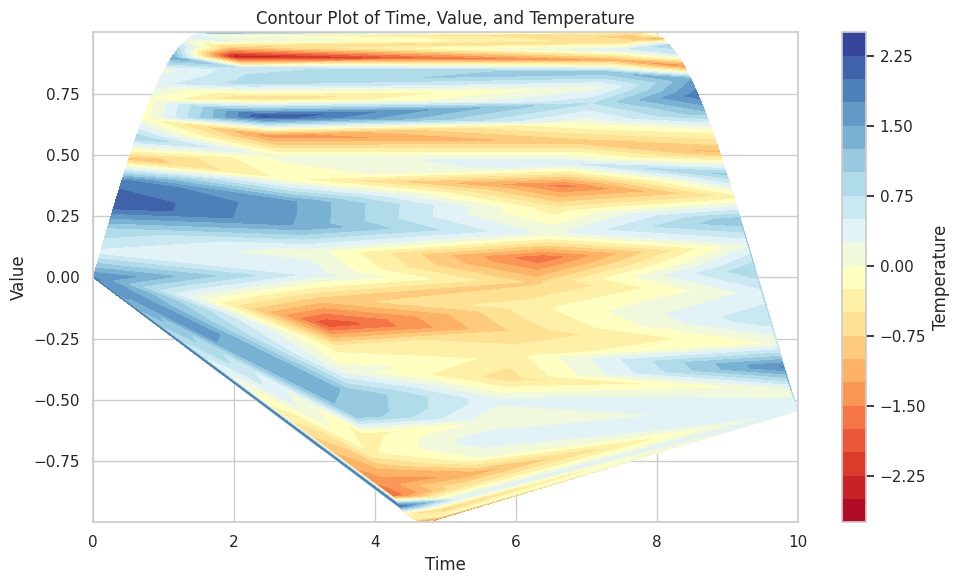

In [ ]:
import matplotlib.pyplot as plt
import numpy as np

# Генерация случайных данных
np.random.seed(0)
time = np.linspace(0, 10, 100)
value = np.sin(time)
temperature = np.random.randn(100)

# Создание контурного графика
plt.figure(figsize=(10, 6))
contour = plt.tricontourf(time, value, temperature, levels=20, cmap='RdYlBu')
plt.colorbar(contour, label='Temperature')
plt.title('Contour Plot of Time, Value, and Temperature')
plt.xlabel('Time')
plt.ylabel('Value')
plt.grid(True)
plt.tight_layout()
plt.show()

Этот код создает контурный график, который визуализирует взаимосвязь между тремя переменными: временем, значением и температурой. Давайте разберем его по частям:

1. **Импорт библиотек**:
   ```python
   import matplotlib.pyplot as plt
   import numpy as np
   ```
   Импортируются необходимые библиотеки: `matplotlib.pyplot` для построения графиков и `numpy` для работы с массивами и генерации случайных данных.

2. **Генерация случайных данных**:
   ```python
   np.random.seed(0)
   time = np.linspace(0, 10, 100)
   value = np.sin(time)
   temperature = np.random.randn(100)
   ```
   - `np.random.seed(0)`: Устанавливает начальное значение генератора случайных чисел для воспроизводимости.
   - `time`: Создает массив из 100 равномерно распределенных значений от 0 до 10.
   - `value`: Вычисляет синус для каждого значения времени.
   - `temperature`: Генерирует 100 случайных значений, следуя нормальному распределению.

3. **Создание контурного графика**:
   ```python
   plt.figure(figsize=(10, 6))
   contour = plt.tricontourf(time, value, temperature, levels=20, cmap='RdYlBu')
   ```
   - `plt.figure(figsize=(10, 6))`: Создает новую фигуру для графика с заданными размерами.
   - `plt.tricontourf(...)`: Строит заполненный контурный график. Здесь используются значения `time` и `value` в качестве координат, а `temperature` — для определения высоты (значений) на графике. Параметр `levels=20` указывает на количество уровней контуров, а `cmap='RdYlBu'` задает цветовую карту.

4. **Добавление цветовой шкалы**:
   ```python
   plt.colorbar(contour, label='Temperature')
   ```
   Добавляет цветовую шкалу, которая показывает, как значения температуры соответствуют цветам на графике.

5. **Настройка заголовков и меток**:
   ```python
   plt.title('Contour Plot of Time, Value, and Temperature')
   plt.xlabel('Time')
   plt.ylabel('Value')
   ```
   Устанавливает заголовок графика и метки для осей X и Y.

6. **Сетка и оформление**:
   ```python
   plt.grid(True)
   plt.tight_layout()
   ```
   Включает сетку для улучшения читаемости и автоматически настраивает параметры подгонки графика.

7. **Отображение графика**:
   ```python
   plt.show()
   ```
   Отображает построенный график.

Таким образом, этот код создает контурный график, который позволяет визуально исследовать, как температура изменяется в зависимости от времени и значения, что может быть полезно для анализа данных в различных областях.


4. **Диаграммы Box Plot (Box Plots)**:
   - Показывают распределение данных временного ряда и выявляют выбросы.
   - Полезны для анализа статистических характеристик, таких как медиана, квартили и диапазон значений.


<Figure size 1200x700 with 0 Axes>

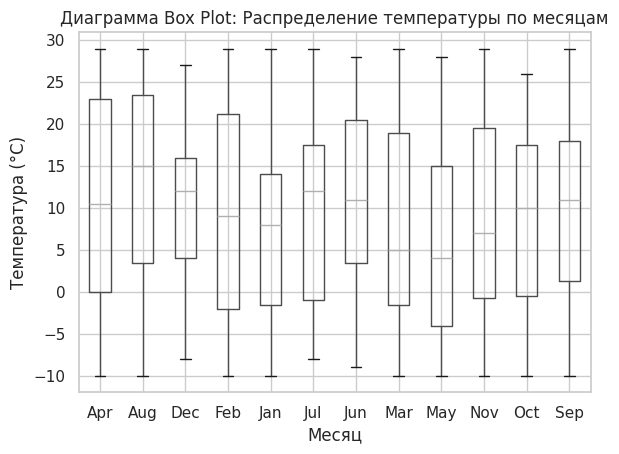

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import calendar  # Import calendar module for month abbreviation

# Генерация искусственного временного ряда
np.random.seed(0)
date_range = pd.date_range(start='2023-01-01', end='2023-12-31', freq='D')
temperature = np.random.randint(low=-10, high=30, size=len(date_range))
sales = np.random.randint(low=50, high=200, size=len(date_range))

# Создание DataFrame с временными данными
df = pd.DataFrame({'Date': date_range, 'Temperature': temperature, 'Sales': sales})
df.set_index('Date', inplace=True)

# Добавление столбца с месяцем в DataFrame
df_box = df.copy()
df_box['Month'] = df_box.index.month
df_box['Month'] = df_box['Month'].apply(lambda x: calendar.month_abbr[x])

# Построение диаграммы Box Plot
plt.figure(figsize=(12, 7))
df_box.boxplot(column='Temperature', by='Month', grid=True)
plt.title('Диаграмма Box Plot: Распределение температуры по месяцам')
plt.xlabel('Месяц')
plt.ylabel('Температура (°C)')
plt.suptitle('')  # Убираем лишний заголовок, который автоматически добавляется
plt.show()

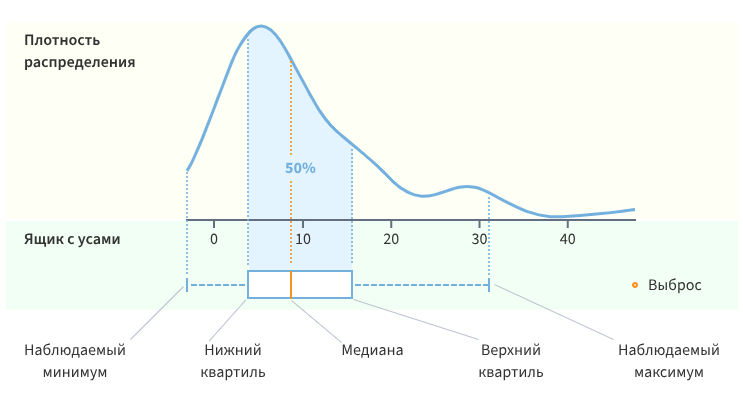

Давайте рассмотрим каждое из этих понятий с примерами.

### 1. Мода
**Мода** — это значение, которое встречается в наборе данных наиболее часто.

**Пример:**
Набор данных: 1, 2, 2, 3, 4
- Мода: 2 (так как 2 встречается чаще всего).

### 2. Медиана
**Медиана** — это значение, которое делит набор данных на две равные части. Для этого данные сначала сортируются.

**Пример:**
Набор данных: 1, 3, 3, 6, 7, 8, 9
- Отсортированный набор: 1, 3, 3, 6, 7, 8, 9
- Медиана: 6 (четвертое число в отсортированном списке).

Если количество элементов четное:
Набор данных: 1, 2, 3, 4
- Отсортированный набор: 1, 2, 3, 4
- Медиана: (2 + 3) / 2 = 2.5

### 3. Верхний квартиль (Q3)
**Верхний квартиль** — это значение, ниже которого находится 75% данных. Это третий квартиль.

**Пример:**
Набор данных: 1, 2, 3, 4, 5, 6, 7, 8, 9
- Отсортированный набор: 1, 2, 3, 4, 5, 6, 7, 8, 9
- Верхний квартиль (Q3): 7 (это значение, ниже которого находятся 75% данных).

### 4. Нижний квартиль (Q1)
**Нижний квартиль** — это значение, ниже которого находится 25% данных. Это первый квартиль.

**Пример:**
Набор данных: 1, 2, 3, 4, 5, 6, 7, 8, 9
- Отсортированный набор: 1, 2, 3, 4, 5, 6, 7, 8, 9
- Нижний квартиль (Q1): 3 (это значение, ниже которого находятся 25% данных).

### 5. Межквартильный размах (МКР)
**Межквартильный размах (МКР)** — это разница между верхним и нижним квартилями (Q3 - Q1). Он показывает, насколько широко распределены средние 50% данных.

**Пример:**
Для набора данных: 1, 2, 3, 4, 5, 6, 7, 8, 9
- Q1 = 3
- Q3 = 7
- МКР = Q3 - Q1 = 7 - 3 = 4

Таким образом, мы имеем:
- Мода: 2
- Медиана: 6
- Нижний квартиль (Q1): 3
- Верхний квартиль (Q3): 7
- Межквартильный размах (МКР): 4



5. **Графики изменчивости (Run Sequence Plots)**:
   - Используются для визуализации последовательности значений временного ряда.
   - Показывают, как значения изменяются во времени без учета временной структуры.


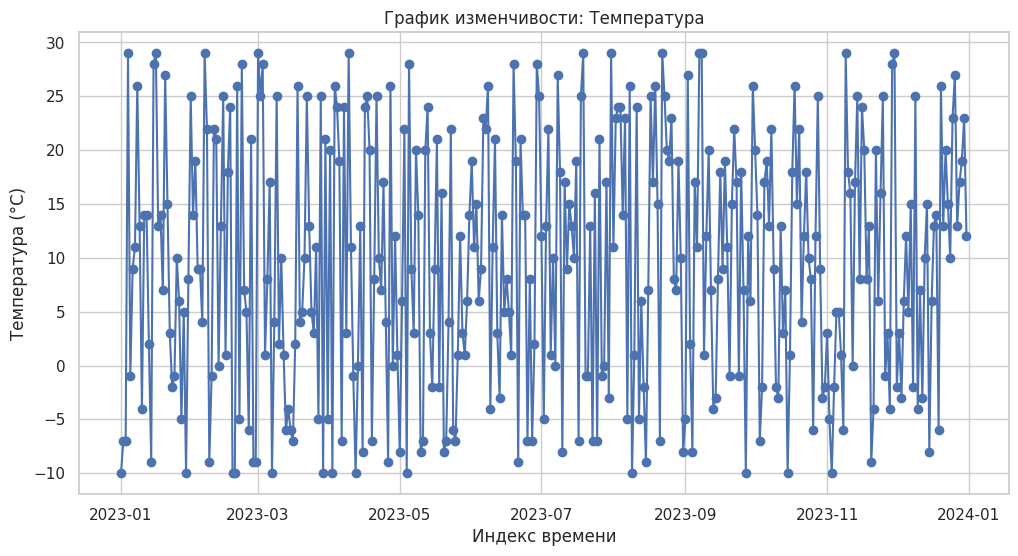

In [ ]:
# 5. График изменчивости (Run Sequence Plot)
plt.figure(figsize=(12, 6))
plt.plot(df.index, df['Temperature'], marker='o', linestyle='-', color='b')
plt.title('График изменчивости: Температура')
plt.xlabel('Индекс времени')
plt.ylabel('Температура (°C)')
plt.grid(True)
plt.show()


6. **Графики событий (Event Plots)**:
   - Используются для отображения событий, происходящих в определенные моменты времени.
   - На временной оси отмечаются моменты событий, что помогает исследовать влияние событий на временной ряд.


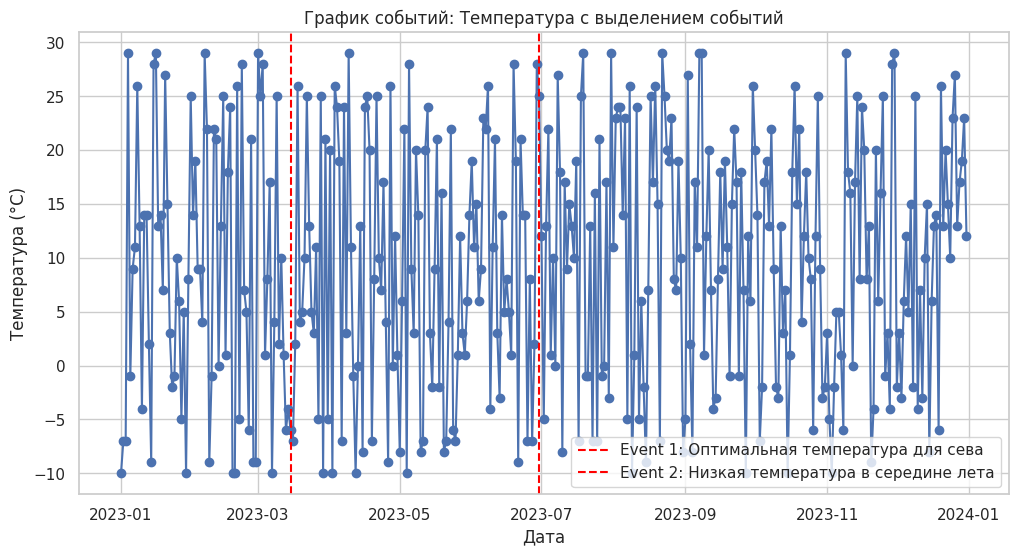

In [ ]:
# 6. График событий (Event Plot)
events = {
    'Event 1': {'Date': '2023-03-15', 'Description': 'Оптимальная температура для сева'},
    'Event 2': {'Date': '2023-06-30', 'Description': 'Низкая температура в середине лета'}
}

plt.figure(figsize=(12, 6))
plt.plot(df.index, df['Temperature'], marker='o', linestyle='-', color='b')
for event, info in events.items():
    plt.axvline(x=pd.Timestamp(info['Date']), color='red', linestyle='--', label=f'{event}: {info["Description"]}')
plt.title('График событий: Температура с выделением событий')
plt.xlabel('Дата')
plt.ylabel('Температура (°C)')
plt.legend()
plt.grid(True)
plt.show()


7. **Спектральные графики (Spectral Plots)**:
   - Используются для анализа частотных характеристик временных рядов.
   - Позволяют выявить периодические компоненты и скрытые циклические паттерны в данных.



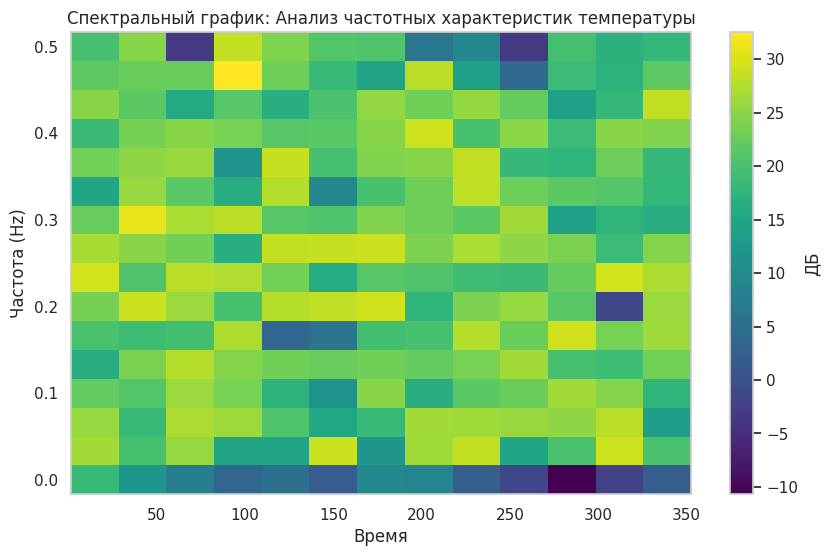

In [ ]:
# 7. Спектральный график (Spectral Plot)
from scipy import signal

plt.figure(figsize=(10, 6))
frequencies, times, Sxx = signal.spectrogram(df['Temperature'], fs=1.0, nperseg=30)
plt.pcolormesh(times, frequencies, 10 * np.log10(Sxx), cmap='viridis')
plt.title('Спектральный график: Анализ частотных характеристик температуры')
plt.xlabel('Время')
plt.ylabel('Частота (Hz)')
plt.colorbar(label='ДБ')
plt.show()

Этот код создает спектральный график, который визуализирует частотные характеристики временного ряда данных о температуре. Давайте разберем его по частям:

1. **Импорт необходимых библиотек**:
   ```python
   from scipy import signal
   import matplotlib.pyplot as plt
   import numpy as np
   ```
   Импортируются библиотеки `scipy.signal` для работы с сигналами, а также `matplotlib.pyplot` и `numpy`.

2. **Создание фигуры для графика**:
   ```python
   plt.figure(figsize=(10, 6))
   ```
   Создает новую фигуру для графика с заданными размерами (10 дюймов в ширину и 6 дюймов в высоту).

3. **Вычисление спектрограммы**:
   ```python
   frequencies, times, Sxx = signal.spectrogram(df['Temperature'], fs=1.0, nperseg=30)
   ```
   - `signal.spectrogram(...)`: Вычисляет спектрограмму для данных о температуре.
     - `df['Temperature']`: Входные данные (временной ряд).
     - `fs=1.0`: Частота дискретизации (в данном случае 1 Гц).
     - `nperseg=30`: Количество точек в каждом сегменте для вычисления (30).

   Эта функция возвращает:
   - `frequencies`: Массив частот.
   - `times`: Массив временных точек.
   - `Sxx`: Спектрограмма, представляющая мощность сигнала в зависимости от времени и частоты.

4. **Создание графика с помощью цветной карты**:
   ```python
   plt.pcolormesh(times, frequencies, 10 * np.log10(Sxx), cmap='viridis')
   ```
   - `plt.pcolormesh(...)`: Строит цветную карту, где ось X представляет время, ось Y — частоты, а цвет — уровень мощности сигнала в децибелах (дБ).
   - `10 * np.log10(Sxx)`: Преобразует значения мощности в децибелы.

5. **Настройка заголовков и меток**:
   ```python
   plt.title('Спектральный график: Анализ частотных характеристик температуры')
   plt.xlabel('Время')
   plt.ylabel('Частота (Hz)')
   ```
   Устанавливает заголовок графика и метки для осей X и Y.

6. **Добавление цветовой шкалы**:
   ```python
   plt.colorbar(label='ДБ')
   ```
   Добавляет цветовую шкалу, показывающую, как значения мощности соответствуют цветам на графике.

7. **Отображение графика**:
   ```python
   plt.show()
   ```
   Отображает построенный график.

Таким образом, этот код создает спектральный график, который позволяет анализировать частотные характеристики временного ряда данных о температуре, что может быть полезно для выявления периодичностей и трендов в данных.

Выбор конкретного типа графика зависит от целей анализа, структуры данных временного ряда и вопросов, которые требуется исследовать. Комбинация различных графиков может дать более полное представление о поведении временного ряда и его характеристиках.


### Предварительный анализ

Предварительный анализ включает:

1. **Проверка на пропуски и выбросы**: обнаружение и обработка пропущенных значений и выбросов.
   - Например, проверка данных на наличие пропусков в записях о температуре.

2. **Дескриптивная статистика**: анализ основных статистических показателей данных.
   - Например, расчет средней температуры, медианы и стандартного отклонения.

3. **Тесты на стационарность**: проверка наличия стационарности временного ряда.
   - Например, тест Дики-Фуллера для проверки стационарности данных.

Эти примеры помогают иллюстрировать основные концепции и методы анализа временных рядов на основе реальных числовых данных.